In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn

In [56]:
plt.style.use('fivethirtyeight') #background set

In [57]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [58]:
data=pd.read_csv('LoanData.csv')

In [59]:
data.shape

(614, 13)

In [60]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [61]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [62]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [63]:
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [64]:
data['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

In [65]:
data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

data.isnull().sum().sum()

0

In [67]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

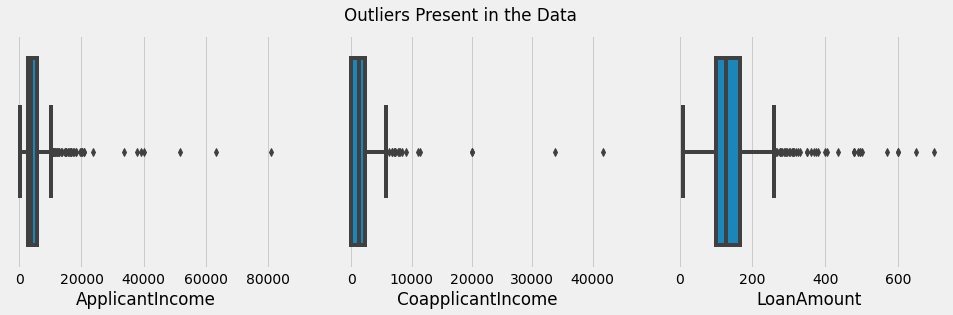

In [68]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(15,4)

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers Present in the Data')
plt.show()

In [69]:
print("Before Removing Outliers",data.shape)

data=data[data['ApplicantIncome']<25000]

print("After Removing Outliers",data.shape)


Before Removing Outliers (614, 13)
After Removing Outliers (607, 13)


In [70]:
print("Before Removing Outliers",data.shape)

data=data[data['LoanAmount']<400]

print("After Removing Outliers",data.shape)

Before Removing Outliers (607, 13)
After Removing Outliers (595, 13)


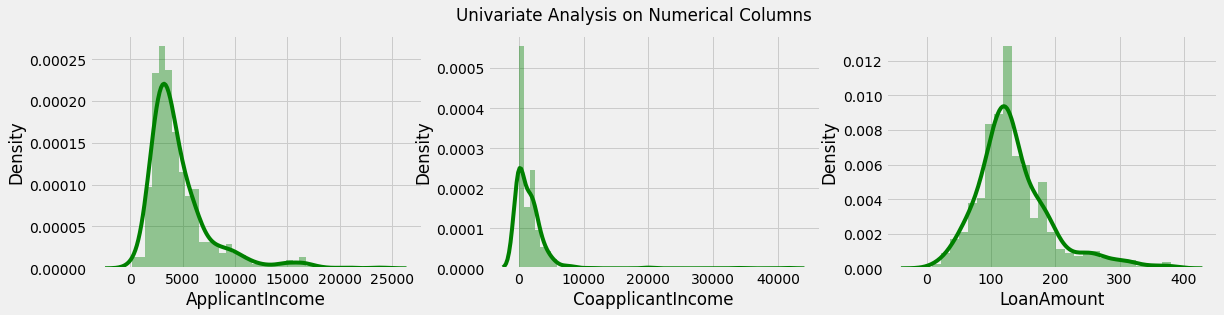

In [71]:
plt.rcParams['figure.figsize']=(18,4)
plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'],color='green')
plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'],color='green')
plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'],color='green')
plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

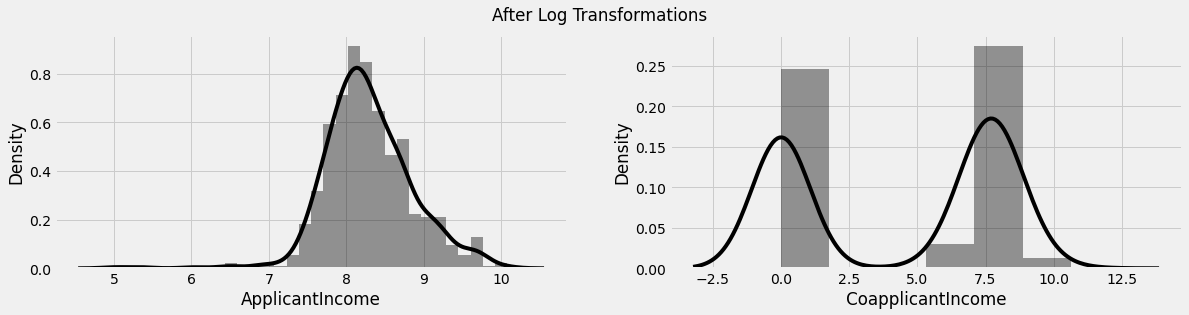

In [72]:
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(18,4)

data['ApplicantIncome']=np.log(data['ApplicantIncome'])
data['CoapplicantIncome']=np.log1p(data['CoapplicantIncome'])

plt.subplot(1,2,1)
sns.distplot(data['ApplicantIncome'],color='black')
plt.subplot(1,2,2)
sns.distplot(data['CoapplicantIncome'],color='black')

plt.suptitle('After Log Transformations')
plt.show()

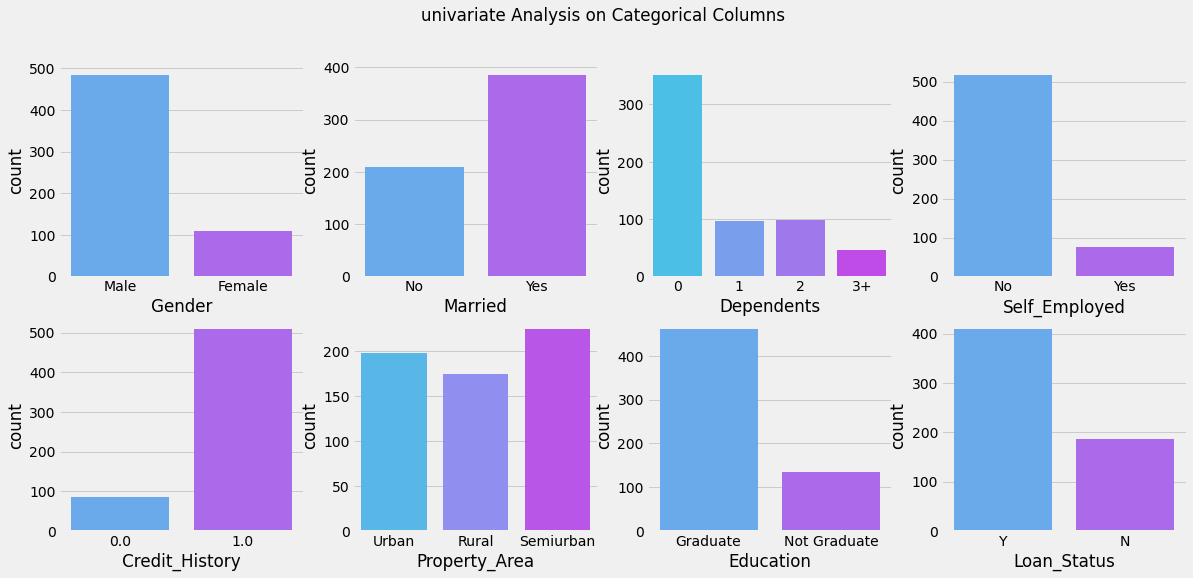

In [73]:
plt.rcParams['figure.figsize']=(18,8)
plt.subplot(2,4,1)
sns.countplot(data['Gender'],palette='cool')
plt.subplot(2,4,2)
sns.countplot(data['Married'],palette='cool')
plt.subplot(2,4,3)
sns.countplot(data['Dependents'],palette='cool')
plt.subplot(2,4,4)
sns.countplot(data['Self_Employed'],palette='cool')
plt.subplot(2,4,5)
sns.countplot(data['Credit_History'],palette='cool')
                   
plt.subplot(2,4,6)
sns.countplot(data['Property_Area'],palette='cool')
plt.subplot(2,4,7)
sns.countplot(data['Education'], palette= 'cool')
plt.subplot(2,4,8)
sns.countplot(data['Loan_Status'],palette="cool")

plt.suptitle('univariate Analysis on Categorical Columns')
plt.show()    

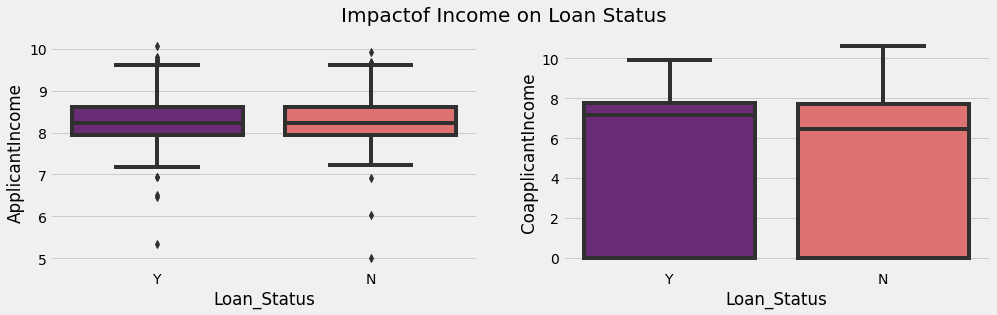

In [74]:
plt.rcParams['figure.figsize']=(15,4)
plt.subplot(1,2,1)
sns.boxplot(data['Loan_Status'],data['ApplicantIncome'],palette='magma')
plt.subplot(1,2,2)
sns.boxplot(data['Loan_Status'],data['CoapplicantIncome'],palette='magma')
plt.suptitle('Impactof Income on Loan Status\n',fontsize=20)
plt.show()

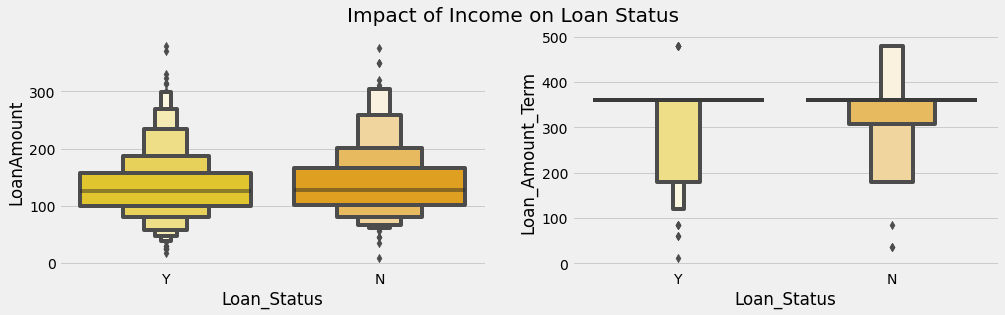

In [75]:
plt.rcParams['figure.figsize']=(15,4)
plt.subplot(1,2,1)
sns.boxenplot(data['Loan_Status'],data['LoanAmount'],palette='Wistia')
plt.subplot(1,2,2)
sns.boxenplot(data['Loan_Status'],data['Loan_Amount_Term'],palette='Wistia')
plt.suptitle('Impact of Income on Loan Status\n',fontsize=20)
plt.show()

In [76]:
print("Impact of Marraige on Loan Status")
print(pd.crosstab(data['Loan_Status'],data['Married']))
print("\n")

print("Impact of Dependents on Loan Status")
print(pd.crosstab(data['Loan_Status'],data['Dependents']))
print("\n")

print("Impact of Education on Loan Status")
print(pd.crosstab(data['Loan_Status'],data['Education']))
print('\n')

print("Impact of Employment on Loan Status")
print(pd.crosstab(data['Loan_Status'],data['Self_Employed']))
print('\n')

print("Impact of Property on Loan status")
print(pd.crosstab(data['Loan_Status'],data['Property_Area']))

Impact of Marraige on Loan Status
Married       No  Yes
Loan_Status          
N             78  108
Y            131  278


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            111  34  25  16
Y            241  63  74  31


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 134            52
Y                 327            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              160   26
Y              358   51


Impact of Property on Loan status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     68
Y                108        172    129


In [77]:
data.select_dtypes('object').head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [78]:
print("Before Deleting Columns:",data.shape)

data=data.drop(['Loan_ID'],axis=1)
                
print("After Deleting Columns:",data.shape)
data.head()

Before Deleting Columns: (595, 13)
After Deleting Columns: (595, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [79]:
data['Gender']=data['Gender'].replace(('Male','Female'),(1,0))
data['Married']=data['Married'].replace(('Yes','No'),(1,0))

data['Education']=data['Education'].replace(('Graduate','Not Graduate'),(1,0))
data['Self_Employed']=data['Self_Employed'].replace(('Yes','No'),(1,0))
data['Loan_Status']=data['Loan_Status'].replace(('Y','N'),(1,0))


data['Property_Area']=data['Property_Area'].replace(('Urban','Semiurban','Rural'),(1,1,0))


data['Dependents']=data['Dependents'].replace(('0','1','2','3+'),(0,1,1,1))

data.select_dtypes('object').columns

Index([], dtype='object')

In [80]:
y=data['Loan_Status']
x=data.drop(['Loan_Status'],axis=1)

       
print("shape of x:",x.shape)
print("Shape of y:",y.shape)

shape of x: (595, 11)
Shape of y: (595,)


In [81]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_resample(x,y.values.ravel())


print(x_resample.shape)
print(y_resample.shape)

(818, 11)
(818,)


In [82]:
print("Before Resampling:")
print(y.value_counts())

print("After Resampling:")
y_resample=pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling:
1    409
0    186
Name: Loan_Status, dtype: int64
After Resampling:
1    409
0    409
Name: 0, dtype: int64


In [83]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2,random_state=0)

print("Shape of the x Train:",x_train.shape)
print("shape of the y Train:",y_train.shape)
print("Shape of the x Test :",x_test.shape)
print("shape of the y Test :",y_test.shape)
             


Shape of the x Train: (654, 11)
shape of the y Train: (654, 1)
Shape of the x Test : (164, 11)
shape of the y Test : (164, 1)


In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
model=LogisticRegression(random_state=0)
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [86]:
y_pred=model.predict(x_test)
print("Training Accuracy:",model.score(x_train,y_train))
print("Testing Accuracy:",model.score(x_test,y_test))

Training Accuracy: 0.7813455657492355
Testing Accuracy: 0.7987804878048781


In [87]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [88]:
model.score(x_test,y_test)


0.7987804878048781

In [89]:
from sklearn.metrics import classification_report,confusion_matrix


In [90]:
cm=confusion_matrix(y_test,y_pred)


In [91]:
cm

array([[67, 23],
       [10, 64]], dtype=int64)

In [92]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()